# Import Dataset

In [1]:
file_path = '/content/drive/MyDrive/SIT782/EV travel range after one full charging.xlsx'

In [2]:
import pandas as pd
import numpy as np

df = pd.read_excel(file_path)
df

,Model,Range
0,Lucid Air,516 Miles
1,Tesla Model S,405 Miles
2,Hyundai Ioniq 6,361 Miles
3,Tesla Model 3,358 Miles
4,Mercedes EQS Sedan,350 Miles
5,Tesla Model X,348 Miles
6,Tesla Model Y,330 Miles
7,GMC Hummer EV Pickup,329 Miles
8,Rivian R1T,328 Miles
9,BMW iX,324 Miles


# Data Preprocessing

In [3]:
df[['Range1', 'km']] = df.Range.str.split(' ', expand=True)
df = df.drop('Range', axis=1)
df

,Model,Range1,km
0,Lucid Air,516,Miles
1,Tesla Model S,405,Miles
2,Hyundai Ioniq 6,361,Miles
3,Tesla Model 3,358,Miles
4,Mercedes EQS Sedan,350,Miles
5,Tesla Model X,348,Miles
6,Tesla Model Y,330,Miles
7,GMC Hummer EV Pickup,329,Miles
8,Rivian R1T,328,Miles
9,BMW iX,324,Miles


In [4]:
df['Range1'] = df['Range1'].astype(float)
for i in range(df.shape[0]):
  if df['km'].loc[i] == 'Miles':
    df['Range1'].loc[i] = df['Range1'].loc[i]*1.60934

df

df = df.drop('km', axis=1)
df = df.rename(columns={'Range1': 'Range(km)'})
df['Range(km)'] = df['Range(km)'].astype(int)

df

<ipython-input-4-8bb822a1d176>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Range1'].loc[i] = df['Range1'].loc[i]*1.60934


,Model,Range(km)
0,Lucid Air,830
1,Tesla Model S,651
2,Hyundai Ioniq 6,580
3,Tesla Model 3,576
4,Mercedes EQS Sedan,563
5,Tesla Model X,560
6,Tesla Model Y,531
7,GMC Hummer EV Pickup,529
8,Rivian R1T,527
9,BMW iX,521


In [5]:
# Delete the wrong row
df = df.drop(index=9)
df

,Model,Range(km)
0,Lucid Air,830
1,Tesla Model S,651
2,Hyundai Ioniq 6,580
3,Tesla Model 3,576
4,Mercedes EQS Sedan,563
5,Tesla Model X,560
6,Tesla Model Y,531
7,GMC Hummer EV Pickup,529
8,Rivian R1T,527
10,Hyundai Kona Electric,449


In [6]:
df.to_excel('EV travel range after one full charging_cleaned.xlsx', index=False)

# Data visualization

In [7]:
df['Range(km)'].describe()

count     17.000000
mean     558.235294
std       93.666649
min      438.000000
25%      520.000000
50%      560.000000
75%      580.000000
max      830.000000
Name: Range(km), dtype: float64

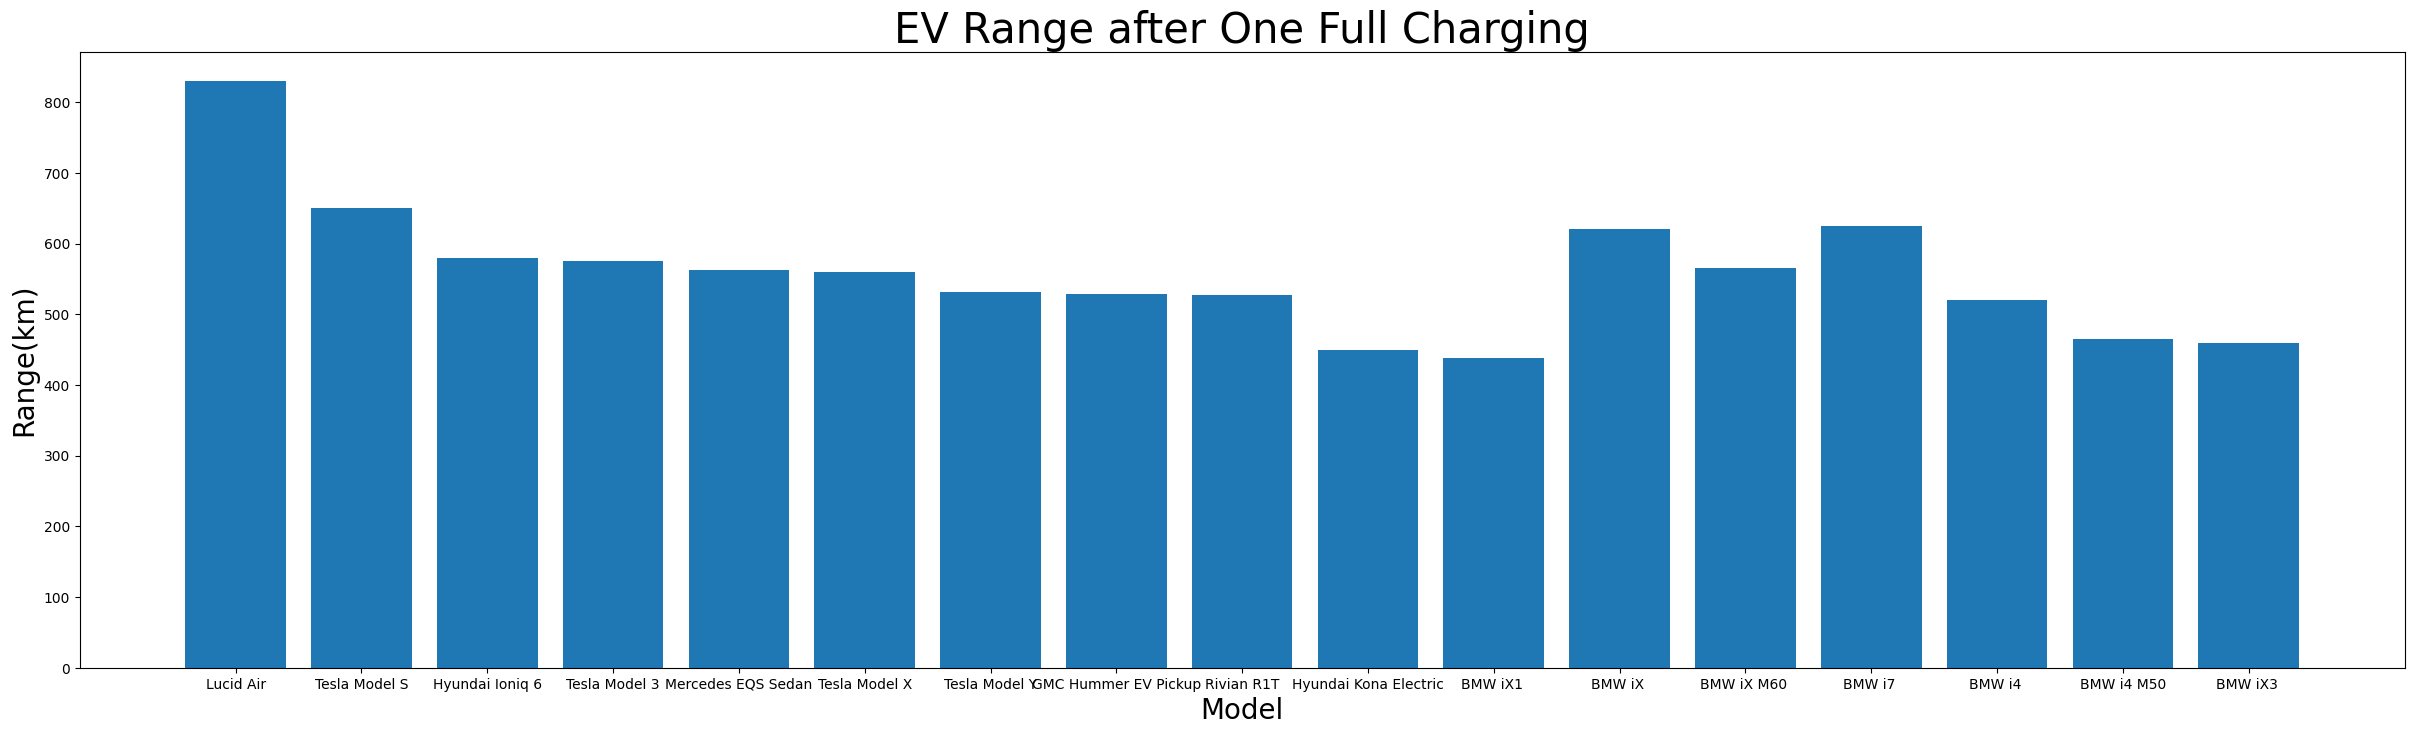

In [8]:
import matplotlib.pyplot as plt

x = df['Model']
y = df['Range(km)']

plt.figure(figsize=(30, 8))

plt.bar(x, y)

plt.title('EV Range after One Full Charging', fontsize=30)
plt.xlabel('Model', fontsize=20)
plt.ylabel('Range(km)', fontsize=20)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [16]:
# The minimum range after 5 years
import math
rangemin_after5 = math.pow((1-0.023), 5) * 438
rangemin_after5

389.8943385726717